## VISUAL EXPLORATION

In [6]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

In [7]:
claimsdf = pd.read_csv('/home/julian/Cursos/Ironhack/Proyectos/ProyectoFinal/Claims-Frequency-Predictions/Notebooks/claimsdf_1.csv')

#### Let's visually explore the variables ClaimNb and Exposure

### CLAIMS AND EXPOSURES

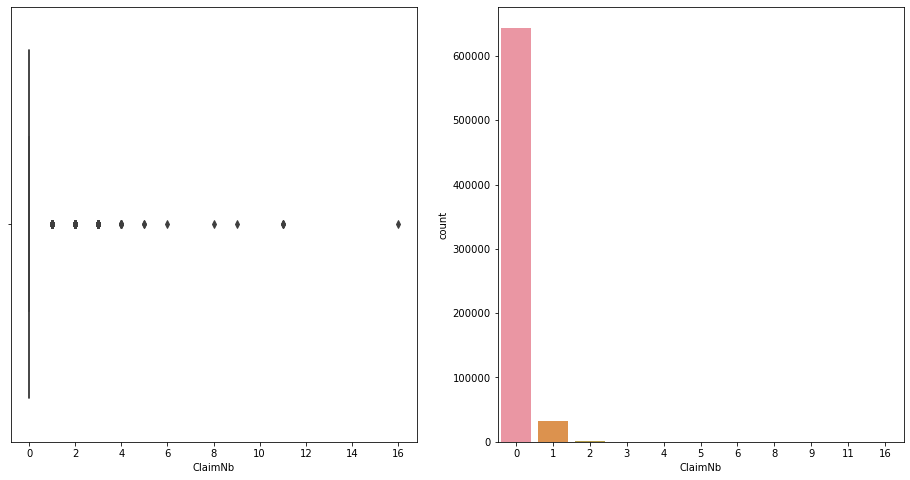

In [8]:
fig, axs = plt.subplots(nrows=1, ncols=2, figsize=(16, 8)) 
sns.boxplot(x=claimsdf.ClaimNb, ax=axs[0])
sns.countplot(x=claimsdf.ClaimNb, ax=axs[1])
fig.savefig("claims_count_box.png");

### AGREGAR MAS CONCLUSIONES

#### From the above graphs we can observe that almost all of the claims for the policies are zero, so in order to use a generalized linear model structure we should considero a zero inflated structure  

## FREQUENCIES vs FEATURE COMPONENTS

#### Let's visually explore the relationships between the observed frequencies and the different features of our portfolio

#### AREA CODES

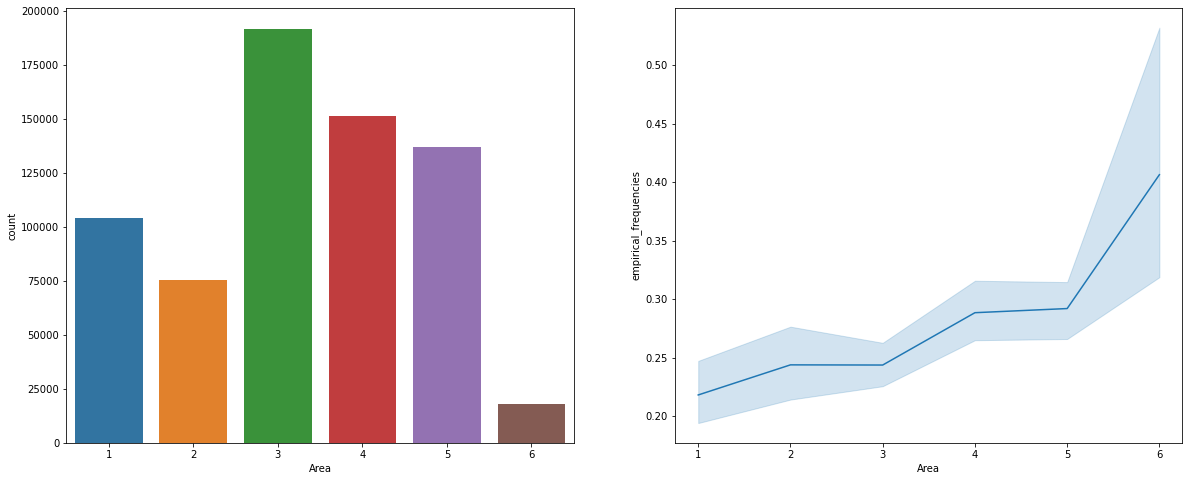

In [9]:
fig, axs = plt.subplots(nrows=1, ncols=2, figsize=(20, 8))
sns.countplot(x=claimsdf.Area, ax=axs[0])
sns.lineplot(data=claimsdf, x=claimsdf.Area, y=claimsdf.empirical_frequencies, ax=axs[1])
fig.savefig("area_codes.png");

#### REGIONS AND POBLATIONAL DENSITY

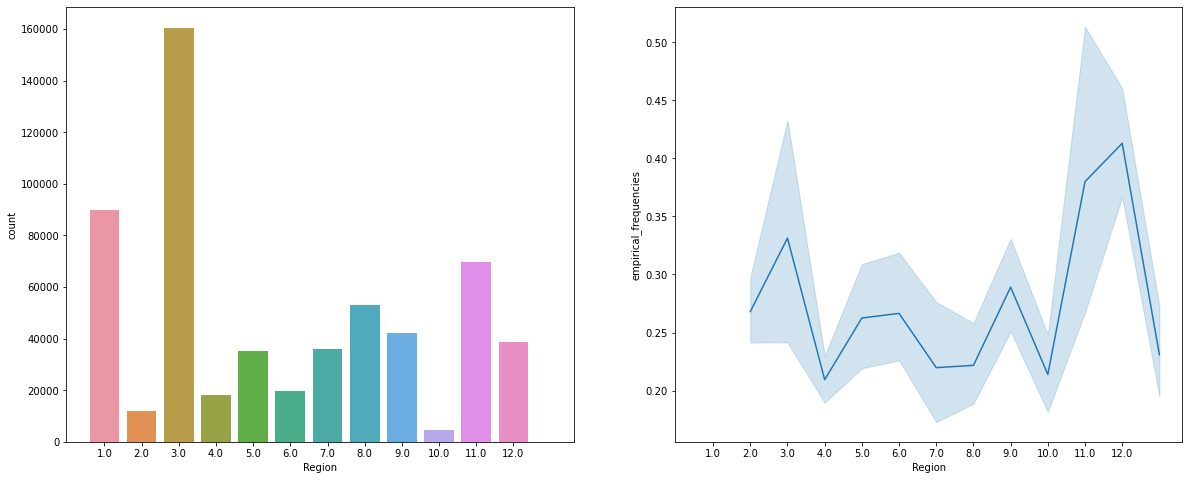

In [23]:
fig, axs = plt.subplots(nrows=1, ncols=2, sharex=True, figsize=(20, 8))
sns.countplot(x=claimsdf.Region, ax=axs[0])
sns.lineplot(data=claimsdf, x=claimsdf.Region, y=claimsdf.empirical_frequencies, ax=axs[1])
fig.savefig("region_counts_empfreq.png");

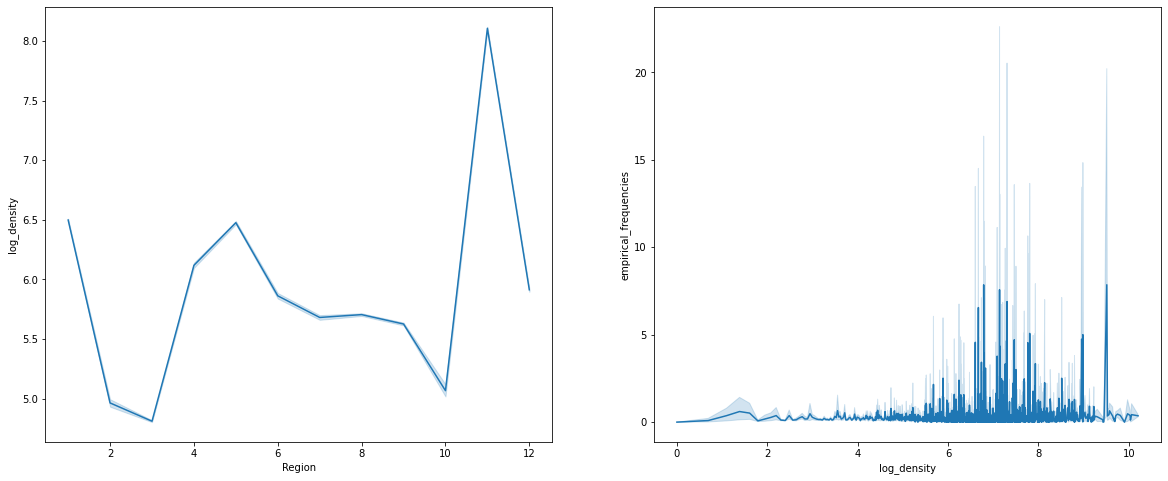

In [11]:
fig, axs = plt.subplots(nrows=1, ncols=2, figsize=(20, 8))
sns.lineplot(data=claimsdf, x=claimsdf.Region, y=claimsdf.log_density, ax=axs[0])
sns.lineplot(data=claimsdf, x=claimsdf.log_density, y=claimsdf.empirical_frequencies, ax=axs[1])
fig.savefig("region_logdens.png");

#### VEHICLE GAS TYPE

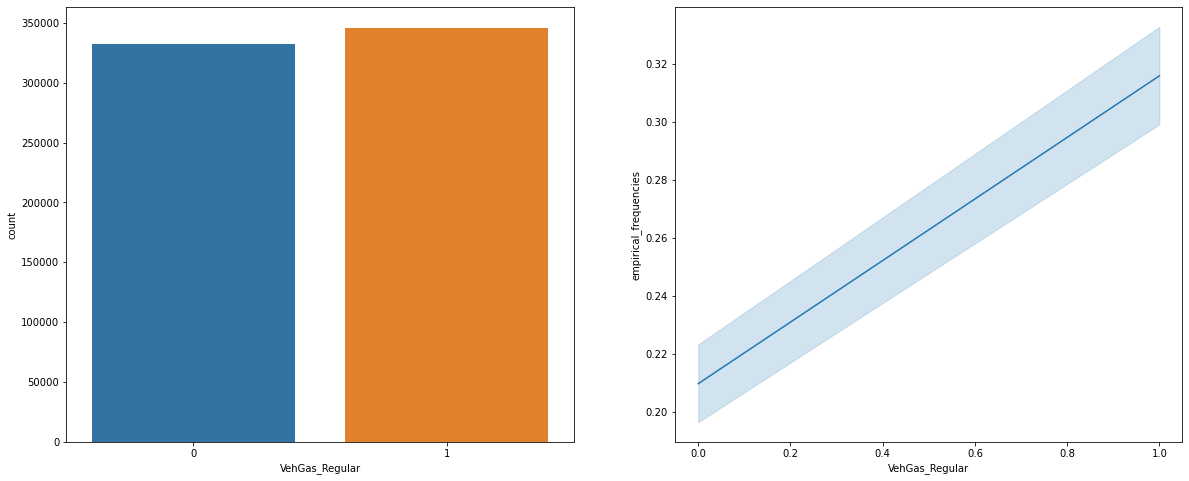

In [12]:
fig, axs = plt.subplots(nrows=1, ncols=2, figsize=(20, 8))
sns.countplot(x=claimsdf.VehGas_Regular, ax=axs[0])
sns.lineplot(data=claimsdf, x=claimsdf.VehGas_Regular, y=claimsdf.empirical_frequencies, ax=axs[1])
fig.savefig("gas_counts_empfreq.png");

#### VEHICLE POWER

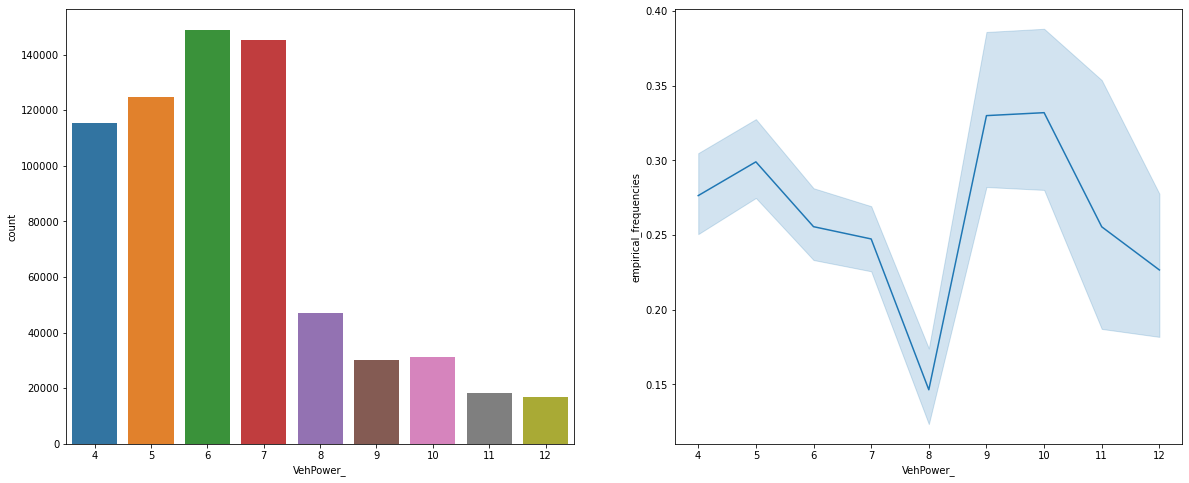

In [13]:
fig, axs = plt.subplots(nrows=1, ncols=2, figsize=(20, 8))
sns.countplot(x=claimsdf.VehPower_, ax=axs[0])
sns.lineplot(data=claimsdf, x=claimsdf.VehPower_, y=claimsdf.empirical_frequencies, ax=axs[1])
fig.savefig("power_counts_empfreq.png");

#### VEHICLE AGE 

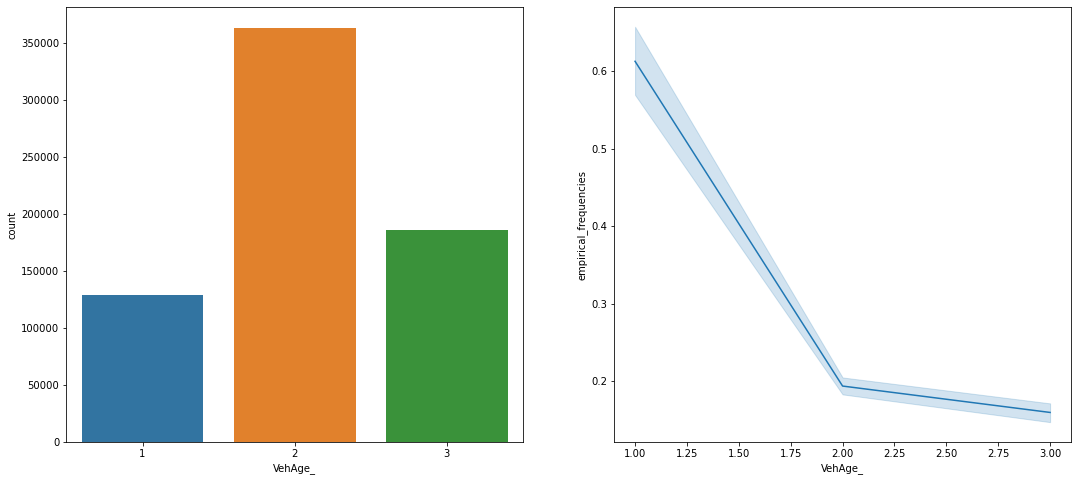

In [14]:
fig, axs = plt.subplots(nrows=1, ncols=2, figsize=(18, 8))
sns.countplot(x=claimsdf.VehAge_, ax=axs[0])
sns.lineplot(data=claimsdf, x=claimsdf.VehAge_, y=claimsdf.empirical_frequencies, ax=axs[1])
fig.savefig("vehage_counts_empfreq.png");

#### DRIVERS AGE

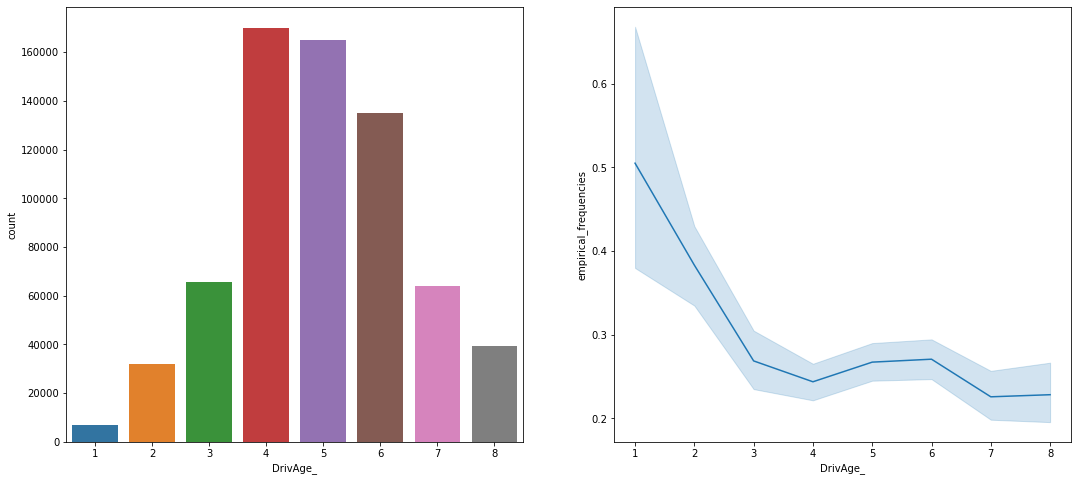

In [15]:
fig, axs = plt.subplots(nrows=1, ncols=2, figsize=(18, 8))
sns.countplot(x=claimsdf.DrivAge_, ax=axs[0])
sns.lineplot(data=claimsdf, x=claimsdf.DrivAge_, y=claimsdf.empirical_frequencies, ax=axs[1])
fig.savefig("drivage_counts_empfreq.png");

#### VEHICLE BRAND 

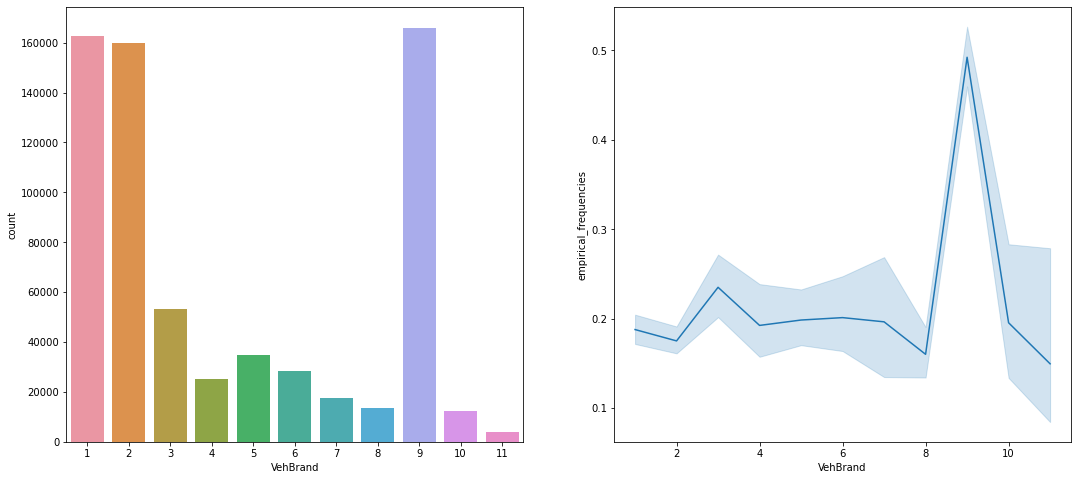

In [16]:
fig, axs = plt.subplots(nrows=1, ncols=2, figsize=(18, 8))
sns.countplot(x=claimsdf.VehBrand, ax=axs[0])
sns.lineplot(data=claimsdf, x=claimsdf.VehBrand, y=claimsdf.empirical_frequencies, ax=axs[1])
fig.savefig("vehbrand_counts_empfreq.png");

#### BONUS MALUS (AGRUPARLO PARA VERLO MEJOR)

In [17]:
def bonusmalus_gr(x):
    """
    ARG: A number
    Returns: Assings a class (from 1 to 7) if x belongs to the specified ranges
    """
    if x in range(50, 61):
        x_ = 1
        return x_
    elif x in range(61,71):
        x_ = 2
        return x_
    elif x in range(71,81):
        x_ = 3
        return x_
    elif x in range(81,91):
        x_ = 4
        return x_
    elif x in range(91,101):
        x_ = 5
        return x_
    elif x in range(101,151):
        x_ = 6
        return x_
    else:
        x_ = 7
        return x_

In [18]:
claimsdf['BonusMalus_'] = claimsdf.BonusMalus.apply(lambda x: bonusmalus_gr(x))

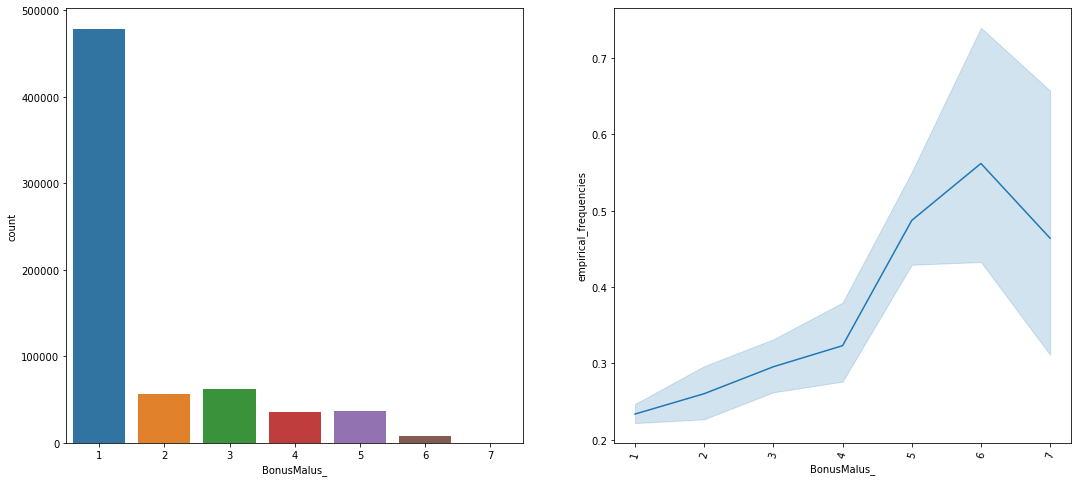

In [19]:
fig, axs = plt.subplots(nrows=1, ncols=2, figsize=(18, 8))
sns.countplot(x=claimsdf.BonusMalus_, ax=axs[0])
sns.lineplot(data=claimsdf, x=claimsdf.BonusMalus_, y=claimsdf.empirical_frequencies, ax=axs[1])
plt.xticks(rotation=75)
fig.savefig("bonusmalus_counts_empfreq.png");

### CORRELATION ANALYSIS FOR THE CONTINOUS VARIABLES

In [20]:
correlations = claimsdf.corr()

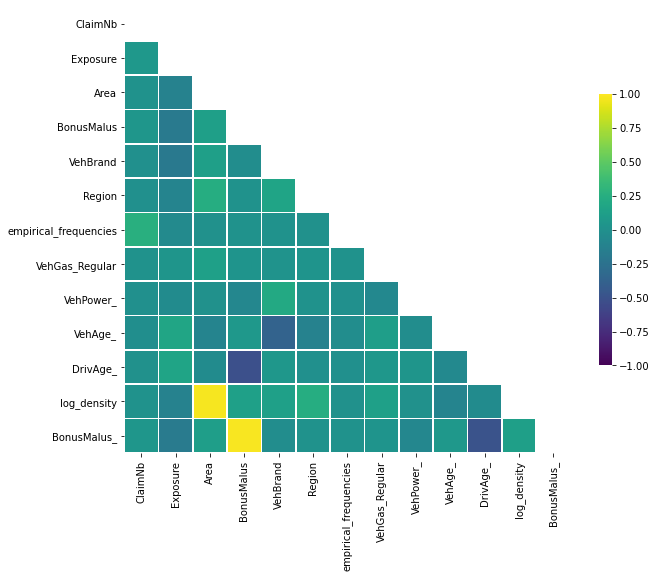

In [21]:
fig, ax = plt.subplots(figsize=(10,10)) 
mask = np.triu(np.ones_like(correlations, dtype=bool))
color_map = sns.diverging_palette(0, 10, as_cmap=True) 
sns.heatmap(correlations, 
            cmap="viridis",
            mask=mask,
            vmax=1,
            vmin=-1,
            square=True, 
            linewidth=.8, 
            cbar_kws={"shrink": .5},
            ax=ax
)
fig.savefig("correlations.png");